In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set style for plotting
sns.set(style="whitegrid")

In [70]:
# Load the data
data = pd.read_csv('dataset/consolidated.csv', sep=";")

# Display the first few rows of the dataframe
data.head()

,dataset,id,property,property_holds,chain,addr,contractname,fp_sol,fp_sol2,fp_bytecode,fp_runtime,swc,dasp
0,CodeSmells,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,Unchecked External Call,f,main,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,MyToken,7391ec54eca9eb37bd2cd1d7263097a6,3aac43ff5e5b48296ec58d5dee7d108d,eb5bcd53f30ce45e455f445819c4dfd1,bbb54fe73d18f1fbbb51bc0c3920e9cd,104.0,4.0
1,CodeSmells,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,Dos Under external influence,f,main,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,MyToken,7391ec54eca9eb37bd2cd1d7263097a6,3aac43ff5e5b48296ec58d5dee7d108d,eb5bcd53f30ce45e455f445819c4dfd1,bbb54fe73d18f1fbbb51bc0c3920e9cd,113.0,5.0
2,CodeSmells,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,strict balance equality,f,main,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,MyToken,7391ec54eca9eb37bd2cd1d7263097a6,3aac43ff5e5b48296ec58d5dee7d108d,eb5bcd53f30ce45e455f445819c4dfd1,bbb54fe73d18f1fbbb51bc0c3920e9cd,132.0,NaN
3,CodeSmells,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,Unmatched type assignment,f,main,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,MyToken,7391ec54eca9eb37bd2cd1d7263097a6,3aac43ff5e5b48296ec58d5dee7d108d,eb5bcd53f30ce45e455f445819c4dfd1,bbb54fe73d18f1fbbb51bc0c3920e9cd,NaN,NaN
4,CodeSmells,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,Transaction state Dependency,f,main,0x00430f32b8e77a456d0ab7e6f1dc1b84f4ae62e0,MyToken,7391ec54eca9eb37bd2cd1d7263097a6,3aac43ff5e5b48296ec58d5dee7d108d,eb5bcd53f30ce45e455f445819c4dfd1,bbb54fe73d18f1fbbb51bc0c3920e9cd,115.0,2.0


In [71]:
# Count the frequency of each item in the column
frequency = data['dataset'].value_counts()

# Find the item with the maximum occurrence
most_frequent_item = frequency.idxmax()
most_frequent_count = frequency.max()

print(f"The most frequent item in the column is '{most_frequent_item}' and it appears {most_frequent_count} times.")

data = data[data["dataset"] == most_frequent_item]
#data = data[data["property"] == "Reentrancy"]

# Count the number of unique items in the 'id' column
unique_ids_count = data['id'].nunique()

print(f"There are {unique_ids_count} unique items in the 'id' column.")

The most frequent item in the column is 'CodeSmells' and it appears 10395 times.
There are 551 unique items in the 'id' column.


In [65]:
# Check the shape of the dataset
print("Data Shape:", data.shape)

# Get a concise summary of the dataframe
data.info()

# Display descriptive statistics
data.describe()

Data Shape: (1531, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 1531 entries, 5 to 19753
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   dataset         1531 non-null   object 
 1   id              1531 non-null   object 
 2   property        1531 non-null   object 
 3   property_holds  1531 non-null   object 
 4   chain           1531 non-null   object 
 5   addr            1531 non-null   object 
 6   contractname    1411 non-null   object 
 7   fp_sol          1411 non-null   object 
 8   fp_sol2         1411 non-null   object 
 9   fp_bytecode     1311 non-null   object 
 10  fp_runtime      1311 non-null   object 
 11  swc             1531 non-null   float64
 12  dasp            1531 non-null   float64
dtypes: float64(2), object(11)
memory usage: 167.5+ KB


,swc,dasp
count,1531.0,1531.0
mean,107.0,1.0
std,0.0,0.0
min,107.0,1.0
25%,107.0,1.0
50%,107.0,1.0
75%,107.0,1.0
max,107.0,1.0


In [66]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 dataset             0
id                  0
property            0
property_holds      0
chain               0
addr                0
contractname      120
fp_sol            120
fp_sol2           120
fp_bytecode       220
fp_runtime        220
swc                 0
dasp                0
dtype: int64


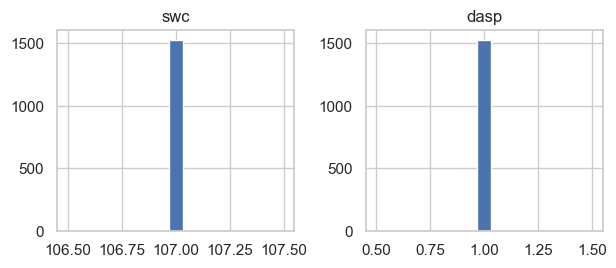

In [67]:
# Select numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for numerical columns
data[numerical_cols].hist(bins=15, figsize=(15, 6), layout=(2, 4))
plt.show()

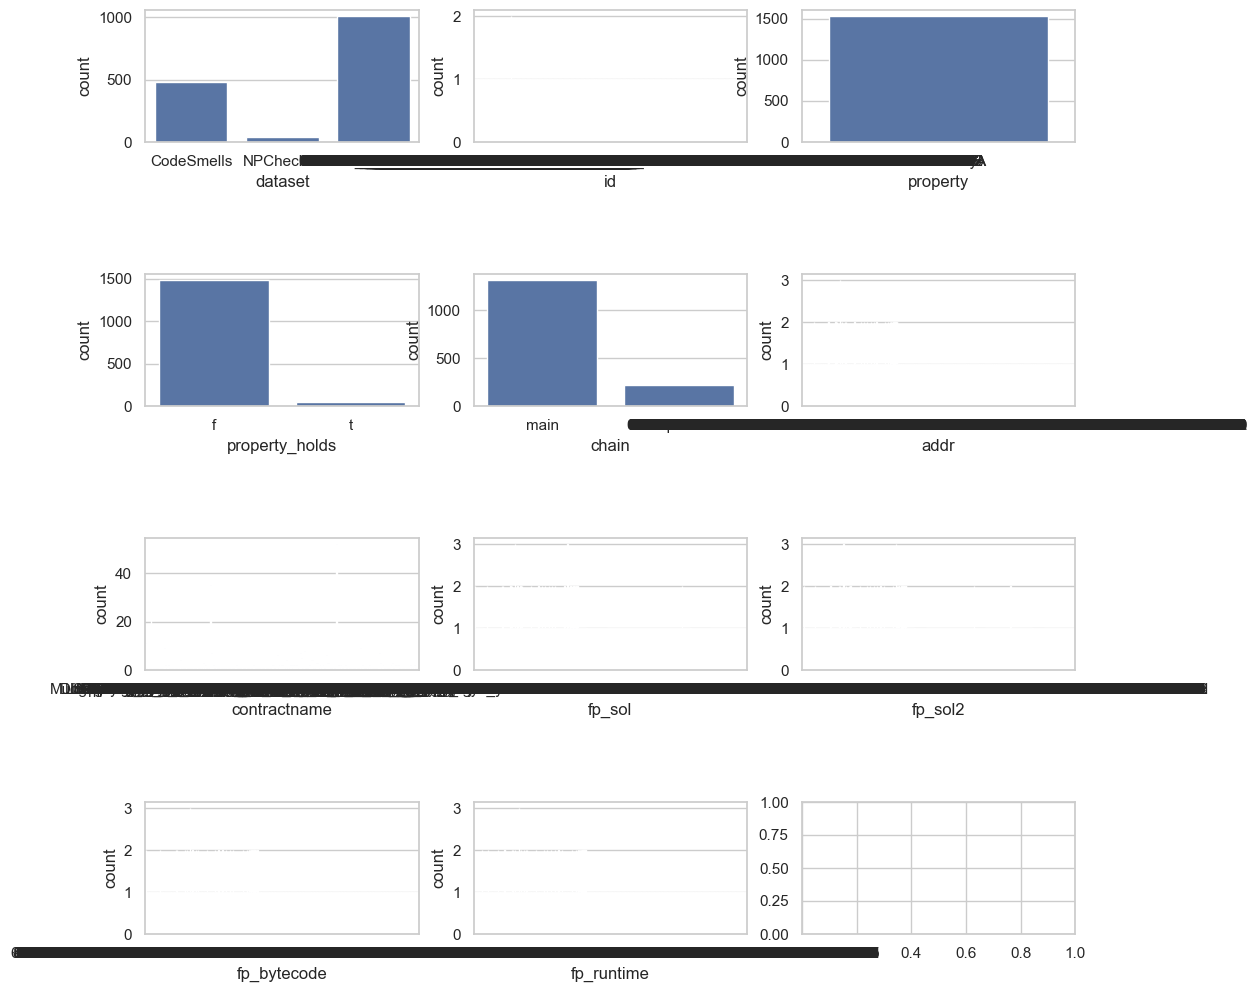

In [68]:
# Select categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Plot count plots for categorical columns
fig, axes = plt.subplots(round(len(list(categorical_cols)) / 3), 3, figsize=(12, 12))
for i, cat_col in enumerate(data[categorical_cols]):
    row, col = i // 3, i % 3
    sns.countplot(x=cat_col, data=data, ax=axes[row, col])

plt.subplots_adjust(hspace=1)